Source for this code is the deep learning playlist in Codebasics youtube channel. 
Link : https://www.youtube.com/playlist?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO

In [ ]:
#!pip install tensorflow

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
# Load train and test data into train test variables
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Lengths of train and test datasets
print('train:',len(x_train), 'test:',len(x_test))

train: 60000 test: 10000


In [ ]:
# Shape of a training sample
x_train[0].shape

(28, 28)

In [ ]:
# Pixel values of the first training sample
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

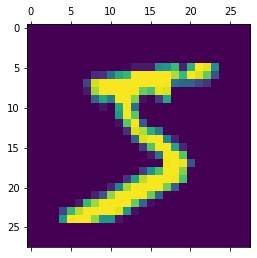

In [ ]:
# View first training sample
plt.matshow(x_train[0])

In [ ]:
# View label of the first 
y_test[0]

7

In [ ]:
# Shape of the training dataset
x_train.shape

(60000, 28, 28)

In [ ]:
# Scale the data to the range between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Flatten each image in the train and test independant variables
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
# Length of the flattened train dataset
x_train_flattened.shape

(60000, 784)

In [ ]:
# Shape of the first image in the train data set
x_train_flattened[0].shape

(784,)

In [ ]:
# Define a simple neural network to classify the data set
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid')
    ]) 

# Compile the model
model.compile(
    optimizer= 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4672 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9254


In [ ]:
# Evaluate test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9255


[0.2681146562099457, 0.9254999756813049]

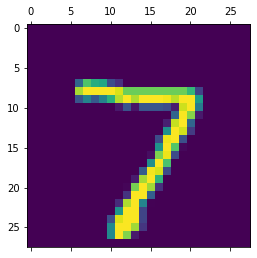

In [ ]:
# View the first image of the test dataset
plt.matshow(x_test[0])

In [ ]:
# Predict the first sample of the dataset 
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.0945454e-02, 3.8094041e-07, 3.9681729e-02, 9.4275028e-01,
       2.2730499e-03, 1.1551754e-01, 1.1482680e-06, 9.9975622e-01,
       9.3270063e-02, 6.9032317e-01], dtype=float32)

In [ ]:
# Return the index of the maximum value (label) of the predicted values for the first test image
np.argmax(y_predicted[0])

7

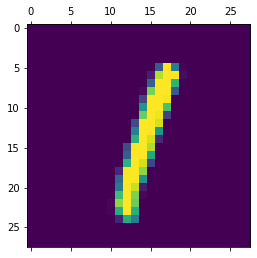

In [ ]:
# View the fifth sample of the dataset 
plt.matshow(x_test[5])

In [ ]:
# Return the index of the maximum value (label) of the predicted values for the fifth image
np.argmax(y_predicted[5])

1

In [ ]:
# Get the predicted labels for each image in the test data set into a list 
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
# Create a confusion matrix betweeen predicted and actual labels
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   5,   10,  915,   18,   10,    5,   13,   11,   41,    4],
       [   3,    0,   16,  924,    0,   28,    3,   10,   17,    9],
       [   1,    1,    2,    1,  918,    0,   13,    4,    7,   35],
       [   9,    3,    2,   26,   10,  792,   17,    4,   24,    5],
       [   9,    3,    5,    1,    7,   11,  919,    2,    1,    0],
       [   1,    8,   21,    5,    8,    1,    0,  942,    2,   40],
       [   9,   10,    7,   25,    9,   37,   10,   10,  844,   13],
       [  11,    7,    1,   11,   27,    9,    0,   19,    3,  921]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

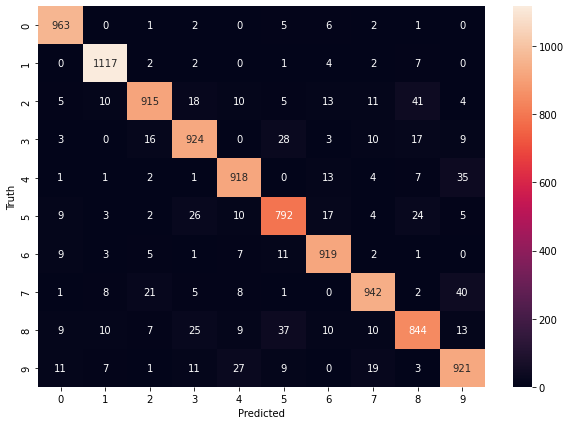

In [ ]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Define a simple neural network to classify the data set
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
    ]) 

# Compile the model
model.compile(
    optimizer= 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2724 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1233 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0852 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0656 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0519 - accuracy: 0.9840


In [ ]:
# Evaluate test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9726


[0.08912166208028793, 0.972599983215332]

In [ ]:
# Define a simple neural network to classify the data set use flatten function in keras to
# reshape the image  
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
    ]) 

# Compile the model
model.compile(
    optimizer= 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2648 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1203 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0846 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0639 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0502 - accuracy: 0.9847
